#CIFAR-10

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

100% 713M/715M [00:09<00:00, 101MB/s] 
100% 715M/715M [00:09<00:00, 80.7MB/s]


In [ ]:
# extracting
from zipfile import ZipFile

data = '/content/cifar-10.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The data has been extracted!')

The data has been extracted!


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.4 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode ='r')
archive.extractall()
archive.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])

['28229.png', '9212.png', '44822.png', '25953.png', '30739.png']


In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
# label encoding
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


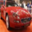

In [ ]:
img = cv2.imread('/content/train/6.png')
cv2_imshow(img)

In [ ]:
ids = list(labels_df['id'])

In [ ]:
print(ids[:5])
print(ids[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
data = []

for id in ids:
  image = cv2.imread('/content/train/' + str(id) + '.png')
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape, Y.shape)

(50000, 32, 32, 3) (50000,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state =2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
cnn_base = ResNet50(weights = 'imagenet', include_top = False, input_shape=(256,256,3))
cnn_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(cnn_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_of_classes, activation = 'softmax'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2  (None, 64, 64, 3)         0         
 D)                                                              
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 128, 128, 3)       0         
 g2D)                                                            
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 256, 256, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                        

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 [==============================] - 460s 386ms/step - loss: 1.1124 - accuracy: 0.6522 - val_loss: 0.4627 - val_accuracy: 0.8895
Epoch 2/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.7636 - accuracy: 0.7981 - val_loss: 0.3297 - val_accuracy: 0.9252
Epoch 3/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.5760 - accuracy: 0.8639 - val_loss: 0.2580 - val_accuracy: 0.9427
Epoch 4/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.4433 - accuracy: 0.9064 - val_loss: 0.2381 - val_accuracy: 0.9435
Epoch 5/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.3559 - accuracy: 0.9304 - val_loss: 0.2146 - val_accuracy: 0.9442
Epoch 6/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.2804 - accuracy: 0.9526 - val_loss: 0.2083 - val_accuracy: 0.9448
Epoch 7/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.2318 - accuracy: 0.9627 - val_

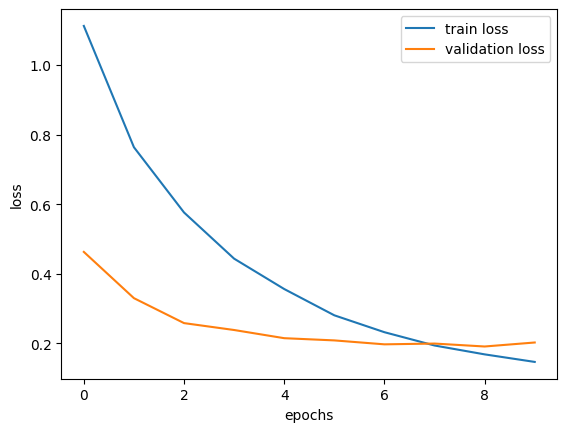

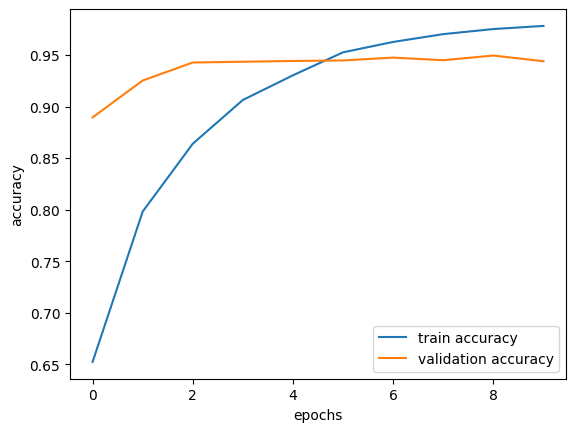

In [ ]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
print('\n\n')
plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
score,accuracy = model.evaluate(X_test,Y_test)
print('Test loss =',score)
print('Test accuracy =',np.round(accuracy*100,2),'%')

313/313 [==============================] - 35s 111ms/step - loss: 0.2000 - accuracy: 0.9487
Test loss = 0.19995012879371643
Test accuracy = 94.87 %
